In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import subprocess

# TODO: add clustering

In [2]:
# Random seed
rng = 20201124
np.random.seed(rng)

# Univariate tests

In [3]:
# Generate data
norm1 = np.random.normal(loc=-4.0, scale=1.0, size=500)
norm2 = np.random.normal(loc=+4.0, scale=1.0, size=500)
data_uni = np.concatenate((norm1, norm2))
np.savetxt("data_uni.csv", data_uni, fmt='%1.5f')

In [4]:
# Generate grid
grid_uni = np.arange(-5.5, +5.5, 0.1)
np.savetxt("grid_uni.csv", grid_uni, fmt='%1.5f')

In [5]:
# True density of data
true_pdf = 0.5 * stats.norm.pdf(grid_uni, -4.0, 1.0) + \
           0.5 * stats.norm.pdf(grid_uni, +4.0, 1.0)

In [6]:
# Iterations to plot the density of
iters = [0, 10, 100, 500, 898]

## Fixed values hyperprior

In [7]:
# Run the executable
cmd = [
  "../build/run",
  "N2", str(rng), "0", "1000", "100",
  "NNIG", "../resources/nnig_fixed_prior.asciipb",
  "DP", "../resources/dp_gamma_prior.asciipb",
  "data_uni.csv", "grid_uni.csv",
  "dens_uf.csv", "mass_uf.csv",
  "nclu_uf.csv", "clus_uf.csv"
]
subprocess.run(cmd, capture_output=True)

KeyboardInterrupt: 

<ipython-input-15-174a628c61ec>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


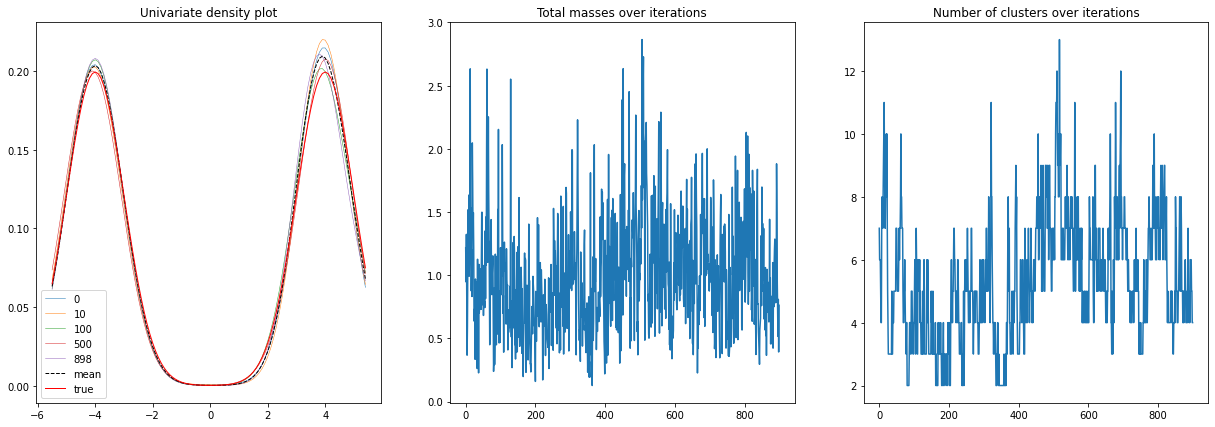

In [15]:
fig = plt.figure(figsize=(20,20))
# pltgrid = plt.GridSpec(2, 3); plt.subplot(grid[0, 1:])

# Densities
matr = np.genfromtxt("dens.csv", delimiter=',')
ax1 = fig.add_subplot(221)
for it in iters:
    ax1.plot(grid_uni, np.exp(matr[:,it]), linewidth=0.5)
ax1.plot(grid_uni, np.exp(np.mean(matr, axis=1)), linewidth=1.0,
         linestyle='--', color="black")

ax1.plot(grid_uni, true_pdf, linewidth=1.0, color="red")
ax1.legend(iters + ["mean", "true"])
ax1.set_title("Univariate density plot")

# Total masses
masses = np.genfromtxt("mass.csv", delimiter='\n')
ax2 = fig.add_subplot(222)
ax2.plot(masses)
ax2.set_title("Total masses over iterations")

# Number of clusters
num_clust = np.genfromtxt("nclu.csv", delimiter='\n')
ax3 = fig.add_subplot(223)
ax3.plot(num_clust)
ax3.set_title("Number of clusters over iterations")

# Clustering
clusters = np.genfromtxt("clus.csv", delimiter='\n')
ax4 = fig.add_subplot(224)
ax4.scatter(data_uni, data_uni, marker='o', color=clusters) #linestyle='')
ax4.set_title("Cluster estimate")

fig.show()

## NGG hyperprior

In [33]:
# Run the executable
cmd[7] = "../resources/nnig_ngg_prior.asciipb"
subprocess.run(cmd, capture_output=True)

In [ ]:
# ...TODO

# Multivariate tests

In [ ]:
# ...TODO

## Fixed values hyperprior

In [ ]:
# ...TODO

<ipython-input-4-b5ca164780fb>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


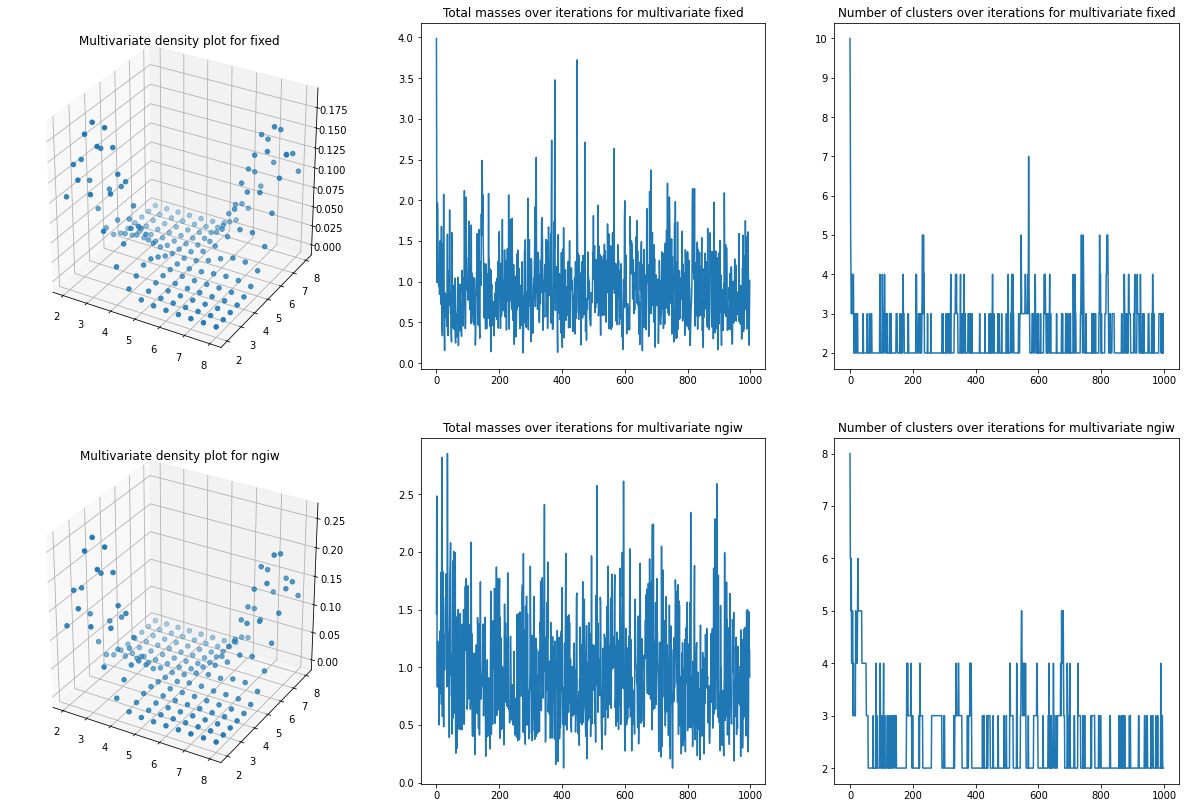

In [4]:
# Multivariate data
grid_multi = np.genfromtxt("../resources/grid_multi.csv", delimiter=' ')

priors_multi = ["fixed", "ngiw"]
idxs = [0, 10, 20, 50, 100, 500, 998]
fig = plt.figure(figsize=(21,14))

for i in range(2):
    prior = priors_multi[i]
    
    # Densities
    matr = np.genfromtxt("dens_multi_%s.csv"%prior, delimiter=',')
    ax1 = fig.add_subplot(231 + 3*i, projection='3d')
    ax1.scatter(grid_multi[:,0], grid_multi[:,1], np.exp(np.mean(matr, axis=1)))
    ax1.set_title("Multivariate density plot for " + prior)
    
    # Total masses
    masses = np.genfromtxt("mass_multi_%s.csv"%prior, delimiter='\n')
    ax2 = fig.add_subplot(232 + 3*i)
    ax2.plot(masses)
    ax2.set_title("Total masses over iterations for multivariate " + prior)
    
    # Number of clusters
    num_clust = np.genfromtxt("nclu_multi_%s.csv"%prior, delimiter='\n')
    ax3 = fig.add_subplot(233 + 3*i)
    ax3.plot(num_clust)
    ax3.set_title("Number of clusters over iterations for multivariate " + prior)

fig.show()

## NGIW hyperprior

In [ ]:
# ...TODO